In [7]:
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [8]:
import os
stockNames=os.listdir("/content/drive/MyDrive/Colab Notebooks/data/csv-10-30/")
print(stockNames)

['AVC.csv', 'ASM.csv', 'BDB.csv', 'BSC.csv', 'ABT.csv', 'AGR.csv', 'C69.csv', 'APS.csv', 'APC.csv', 'BHT.csv', 'BIC.csv', 'ASG.csv', 'BDW.csv', 'BTP.csv', 'CCI.csv', 'BSI.csv', 'AGP.csv', 'C47.csv', 'BCP.csv', 'AMC.csv', 'API.csv', 'ADC.csv', 'AAA.csv', 'BPC.csv', 'ACC.csv', 'BCE.csv', 'BBS.csv', 'BKH.csv', 'CCL.csv', 'BTH.csv', 'AMV.csv', 'BMF.csv', 'BKG.csv', 'BST.csv', 'BII.csv', 'BLT.csv', 'BAB.csv', 'ALT.csv', 'BWA.csv', 'BMS.csv', 'APG.csv', 'BMC.csv', 'BSR.csv', 'AAM.csv', 'C32.csv', 'ABS.csv', 'ACL.csv', 'AAT.csv', 'BRC.csv', 'C21.csv', 'BCC.csv', 'AAV.csv', 'BCG.csv', '1-log-crawl.txt', 'RCL.csv', 'L18.csv', 'PSI.csv', 'FIC.csv', 'QNC.csv', 'CHP.csv', 'FLC.csv', 'SJG.csv', 'MKV.csv', 'DAT.csv', 'GMC.csv', 'NAV.csv', 'S4A.csv', 'DQC.csv', 'GEX.csv', 'MVB.csv', 'CTI.csv', 'DPP.csv', 'CLH.csv', 'KHA.csv', 'SED.csv', 'ITD.csv', 'KHG.csv', 'HBD.csv', 'DTC.csv', 'OCB.csv', 'HBC.csv', 'PVB.csv', 'HU1.csv', 'HC3.csv', 'HDB.csv', 'MIG.csv', 'PTS.csv', 'HT1.csv', 'DRH.csv', 'SGS.csv', '

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [78]:
#Dùng 6 thuộc tính để train => input shape=30, 6
def training():
  for name in stockNames[8:9]: # chọn các mã để train, mỗi file chạy mất khoảng 4p nên chạy ít thôi không thì giảm số vòng lặp đi
    data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/csv-10-30/'+name,
                    names=[ 'date', 'adjust', 'close', 'change_perc', 'avg', 'volume_match', 'value_match', 
                              'volume_reconcile', 'value_reconcile', 'open', 'high', 'low', 'volume'])
    data.drop(["change_perc", "volume_match", "avg",
                            "value_match", "volume_reconcile", "value_reconcile"],  axis = 1, inplace = True)
    #chuẩn hóa
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data.values[:, 1:])# 6 thuộc tính

    index=int(2*scaled.shape[0]/3)

    X_train=scaled[0:index]
    y_train=scaled[31:index+31]

    X_train=[[] for i in range(X_train.shape[0])]

    for i in range(len(X_train)):
      X_train[i].append(scaled[i:i+30])# 30 ngày vào 1 lượt

    X_train=np.array(X_train)
    X_train=np.reshape(X_train, (X_train.shape[0], 30, 6))

    #Model
    regressor = Sequential()
    #input_shape: 30 là cửa sổ, đầu ra mỗi bước là 6 thuộc tính của X_train
    regressor.add(LSTM(units=6, activation= 'sigmoid', input_shape=(30, X_train[0].shape[-1])))
    # regressor.add(LSTM(units=1, activation= 'sigmoid', input_shape=(X_train.shape[1], 1)))

    regressor.compile(optimizer='adam', loss='mean_squared_error')
    regressor.fit(X_train, y_train, batch_size=30, epochs=500)

    regressor.save('outputModels2/'+name[:-4]+'.h5')
    print('Saved '+ name)



In [79]:
training()

Epoch 1/500
32/32 [==============================] - 1s 7ms/step - loss: 0.0625
Epoch 2/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0532
Epoch 3/500
32/32 [==============================] - 0s 8ms/step - loss: 0.0472
Epoch 4/500
32/32 [==============================] - 0s 8ms/step - loss: 0.0427
Epoch 5/500
32/32 [==============================] - 0s 8ms/step - loss: 0.0390
Epoch 6/500
32/32 [==============================] - 0s 8ms/step - loss: 0.0359
Epoch 7/500
32/32 [==============================] - 0s 8ms/step - loss: 0.0330
Epoch 8/500
32/32 [==============================] - 0s 8ms/step - loss: 0.0306
Epoch 9/500
32/32 [==============================] - 0s 8ms/step - loss: 0.0283
Epoch 10/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0263
Epoch 11/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0245
Epoch 12/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0229
Epoch 13/500
32/32 [=================

In [80]:
from tensorflow import keras
def test(name):
  model = keras.models.load_model('outputModels2/'+name+'.h5')
  data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/csv-10-30/'+name+'.csv',
                    names=[ 'date', 'adjust', 'close', 'change_perc', 'avg', 'volume_match', 'value_match', 
                              'volume_reconcile', 'value_reconcile', 'open', 'high', 'low', 'volume'])
  data.drop(["change_perc", "volume_match", "avg",
                          "value_match", "volume_reconcile", "value_reconcile"],  axis = 1, inplace = True)
  scaler = StandardScaler()
  scaled = scaler.fit_transform(data.values[:, 1:])

  index=int(2*scaled.shape[0]/3)# vị trí bắt đầu dự đoán
  index=0 # thử đoán từ đầu 
  inputs = scaled[index:] 

  inputs=[[] for i in range(inputs.shape[0]-29)]
  for i in range(len(inputs)):
    inputs[i].append(scaled[index+i:index+i+30])

  inputs=np.array(inputs)
  print(inputs.shape[0])

  inputs = np.reshape(inputs, (inputs.shape[0], 30, 6))
  predicted_stock_price = model.predict(inputs)
  predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
  predicted_stock_price=predicted_stock_price[:,1:2].reshape(inputs.shape[0])


  real_stock_price=data.values[index+30:, 2:3].reshape(inputs.shape[0]-1)#real from data

  loss=0
  for i in range(len(real_stock_price)):
    loss+=predicted_stock_price[i]-real_stock_price[i]
  print('Sum loss: '+str(loss))

  plt.plot( real_stock_price[:] , color = 'red' , label = 'Real Stock Price')
  plt.plot( predicted_stock_price[:], color = 'green' , label = 'Predicted Stock Price')
  plt.title('Stock Price Prediction '+name)
  plt.xlabel('time' )
  plt.ylabel('Stock Price')
  plt.legend()
  plt.show()


1397
Sum loss: 3298.142277526852


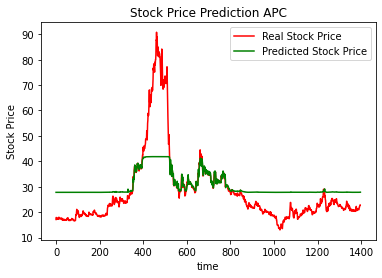

In [81]:
test('APC')